# fastai.vision.transform

Common Image transformations on the `Image` class. Can be composed together applied with random values.

### Debug

In [ ]:
%reload_ext autoreload
%autoreload 2
import inspect
import matplotlib.pyplot as plt
from gen_doc import nbdoc
!wget 'https://img.huffingtonpost.com/asset/5b7fdeab1900001d035028dc.jpeg?cache=sixpwrbb1s&ops=1910_1000' -O 'data/dog.jpg'
x = lambda: open_image('data/dog.jpg')
import torch

--2018-09-21 12:37:23--  https://img.huffingtonpost.com/asset/5b7fdeab1900001d035028dc.jpeg?cache=sixpwrbb1s&ops=1910_1000
Resolving img.huffingtonpost.com (img.huffingtonpost.com)... 192.229.210.207
Connecting to img.huffingtonpost.com (img.huffingtonpost.com)|192.229.210.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 269360 (263K) [image/jpeg]
Saving to: ‘data/dog.jpg’

data/dog.jpg        100%[===================>] 263.05K  --.-KB/s    in 0.04s   

2018-09-21 12:37:23 (7.34 MB/s) - ‘data/dog.jpg’ saved [269360/269360]



In [ ]:
from gen_doc.nbdoc import * 

In [ ]:
from fastai.vision.transform import * 

In [ ]:
get_module_toc("fastai.vision.transform")

- [AffineFunc](#AffineFunc)
- [apply_tfms](#apply_tfms)
- [brightness](#brightness)
- [contrast](#contrast)
- [CoordFunc](#CoordFunc)
- [crop](#crop)
- [flip_lr](#flip_lr)
- [Image](#Image)
  - [Image.from_file](#Image.from_file)
  - [Image.refresh](#Image.refresh)
  - [Image.lighting](#Image.lighting)
  - [Image.pixel](#Image.pixel)
  - [Image.coord](#Image.coord)
  - [Image.affine](#Image.affine)
  - [Image.resize](#Image.resize)
  - [Image.show](#Image.show)
  - [Image.brightness](#Image.brightness)
  - [Image.contrast](#Image.contrast)
  - [Image.rotate](#Image.rotate)
  - [Image.zoom](#Image.zoom)
  - [Image.squish](#Image.squish)
  - [Image.flip_lr](#Image.flip_lr)
  - [Image.pad](#Image.pad)
  - [Image.crop](#Image.crop)
  - [Image.jitter](#Image.jitter)
  - [Image.zoom_squish](#Image.zoom_squish)
- [image2np](#image2np)
- [ImageBase](#ImageBase)
  - [ImageBase.lighting](#ImageBase.lighting)
  - [ImageBase.pixel](#ImageBase.pixel)
  - [ImageBase.coord](#ImageBase.coord)
  - [ImageBase.affine](#ImageBase.affine)
  - [ImageBase.set_sample](#ImageBase.set_sample)
  - [ImageBase.clone](#ImageBase.clone)
- [ItemBase](#ItemBase)
- [jitter](#jitter)
- [LightingFunc](#LightingFunc)
- [log_uniform](#log_uniform)
- [open_image](#open_image)
- [pad](#pad)
- [pil2tensor](#pil2tensor)
- [PixelFunc](#PixelFunc)
- [rand_bool](#rand_bool)
- [RandTransform](#RandTransform)
  - [RandTransform.resolve](#RandTransform.resolve)
- [resolve_tfms](#resolve_tfms)
- [show_image](#show_image)
- [show_image_batch](#show_image_batch)
- [show_images](#show_images)
- [TfmAffine](#TfmAffine)
- [TfmCoord](#TfmCoord)
- [TfmLighting](#TfmLighting)
- [TfmList](#TfmList)
- [TfmPixel](#TfmPixel)
- [Transform](#Transform)
  - [Transform.calc](#Transform.calc)
- [uniform](#uniform)
- [zoom](#zoom)
- [zoom_squish](#zoom_squish)


### Global Variable Definitions:

`AffineFunc = Callable[[KWArgs], AffineMatrix]` <div style="text-align: right"><a href="../../fastai/vision/transform.py#L48">[source]</a></div>

`CoordFunc = Callable[[FlowField, CoordSize, ArgStar, KWArgs], LogitTensorImage]` <div style="text-align: right"><a href="../../fastai/vision/transform.py#L47">[source]</a></div>

`FlowField = Tensor` <div style="text-align: right"><a href="../../fastai/vision/transform.py#L37">[source]</a></div>

`LightingFunc = Callable[[LogitTensorImage, ArgStar, KWArgs], LogitTensorImage]` <div style="text-align: right"><a href="../../fastai/vision/transform.py#L45">[source]</a></div>

`PixelFunc = Callable[[TensorImage, ArgStar, KWArgs], TensorImage]` <div style="text-align: right"><a href="../../fastai/vision/transform.py#L46">[source]</a></div>

`TfmList=Collection[Transform]` <div style="text-align: right"><a href="../../fastai/vision/transform.py#L374">[source]</a></div>

In [ ]:
show_doc(apply_tfms)

<a id=apply_tfms></a>**apply_tfms**(<em>tfms</em>: typing.Collection[fastai.vision.transform.Transform], <em>x</em>: Tensor, <em>do_resolve</em>: bool=True, <em>xtra</em>: typing.Union[typing.Dict[fastai.vision.transform.Transform, dict], NoneType]=None, <em>size</em>: typing.Tuple[int, int, int]=None) -> Tensor


apply `tfms` to x, resize to `size`. `do_resolve` rebind random params. `xtra` custom args for a tfm

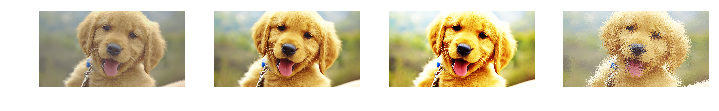

In [ ]:
tfms = [contrast(scale=(0.3,3.0), p=0.75),
        brightness(change=(0.35,0.65), p=0.75),
        jitter(magnitude=(0.0,0.05), p=0.75)]

_,axes = plt.subplots(1,4, figsize=(12,3))
for ax in axes: apply_tfms(tfms,x()).show(ax)

In [ ]:
show_doc(Image)

<a id=Image></a><em>class</em> **Image**(<em>px</em>: Tensor) -> Image :: Inherits from (`ImageBase`)


supports appying transforms to image data

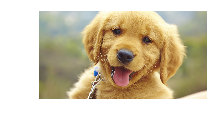

In [ ]:
Image.from_file(fn='data/dog.jpg').show()

In [ ]:
show_doc(Image.affine)

<a id=affine></a>**affine**(<em>self</em>, <em>func</em>: typing.Callable[[typing.Dict[str, typing.Any]], torch.Tensor]) -> Image


equivalent to `image.affine_mat = image.affine_mat @ func()`

affine takes a list of affine transformations and composes them together into a single affine matrix. This matrix is then applied to the image tensor to make the transformation.

In [ ]:
show_doc(Image.brightness)

<a id=<lambda>></a>**<lambda>**(<em>x</em>)

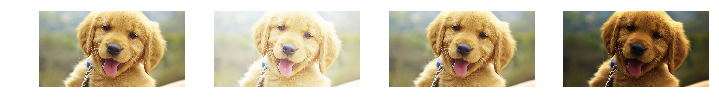

In [ ]:
_,axes = plt.subplots(1,4, figsize=(12,3))

x().show(axes[0])
brightness(x(), 0.8).show(axes[1])
brightness(x(), 0.5).show(axes[2])
brightness(x(), 0.2).show(axes[3])

In [ ]:
show_doc(Image.contrast)

<a id=<lambda>></a>**<lambda>**(<em>x</em>)

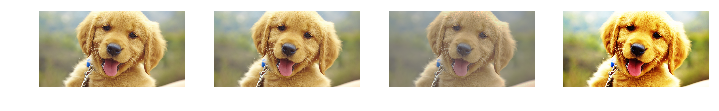

In [ ]:
_,axes = plt.subplots(1,4, figsize=(12,3))

x().show(axes[0])
contrast(x(), 1.0).show(axes[1])
contrast(x(), 0.5).show(axes[2])
contrast(x(), 2.0).show(axes[3])

In [ ]:
show_doc(Image.coord)

<a id=coord></a>**coord**(<em>self</em>, <em>func</em>: typing.Callable[[torch.Tensor, typing.Tuple[int, int, int], typing.Collection[typing.Any], typing.Dict[str, typing.Any]], torch.Tensor]) -> Image


equivalent to `image.flow = func(image.flow, image.size)`

In [ ]:
show_doc(Image.crop)

<a id=<lambda>></a>**<lambda>**(<em>x</em>)

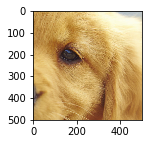

In [ ]:
x().crop(500, 0.25, 0.75).show(hide_axis=False, figsize=(2,2))

In [ ]:
show_doc(Image.flip_lr)

<a id=<lambda>></a>**<lambda>**(<em>x</em>)

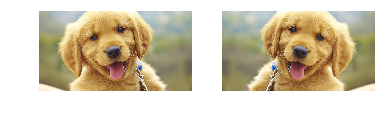

In [ ]:
_,axes = plt.subplots(1,2, figsize=(6,3))
x().flip_lr().show(axes[0])
x().show(axes[1])

In [ ]:
show_doc(Image.jitter)

<a id=<lambda>></a>**<lambda>**(<em>x</em>)

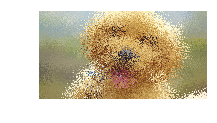

In [ ]:
x().jitter(magnitude=.1).show()

In [ ]:
show_doc(Image.lighting)

<a id=lighting></a>**lighting**(<em>self</em>, <em>func</em>: typing.Callable[[torch.Tensor, typing.Collection[typing.Any], typing.Dict[str, typing.Any]], torch.Tensor]) -> Image


equivalent to `image = sigmoid(func(logit(image)))`

In [ ]:
show_doc(Image.pad, 
         arg_comments={'mode': '‘constant’, ‘reflect’ or ‘replicate’ - see [torch](https://pytorch.org/docs/stable/nn.html#torch.nn.functional.pad)'})

<a id=<lambda>></a>**<lambda>**(<em>x</em>)



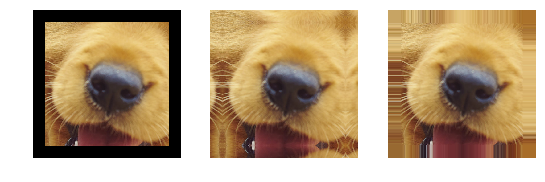

In [ ]:
_,axes = plt.subplots(1,3, figsize=(9,3))
x().crop(400).pad(40, 'constant').show(axes[0])
x().crop(400).pad(40, 'reflect').show(axes[1])
x().crop(400).pad(40, 'replicate').show(axes[2])

In [ ]:
show_doc(Image.pixel)

<a id=pixel></a>**pixel**(<em>self</em>, <em>func</em>: typing.Callable[[torch.Tensor, typing.Collection[typing.Any], typing.Dict[str, typing.Any]], torch.Tensor]) -> Image


equivalent to `image.px = func(image.px)`

In [ ]:
show_doc(Image.refresh)

<a id=refresh></a>**refresh**(<em>self</em>) -> None


applies any logit or affine transfers that have been

In [ ]:
show_doc(Image.resize)

<a id=resize></a>**resize**(<em>self</em>, <em>size</em>: typing.Union[int, typing.Tuple[int, int, int]]) -> Image


resize the image to `size`, size can be a single int

In [ ]:
show_doc(Image.rotate)

<a id=<lambda>></a>**<lambda>**(<em>x</em>)

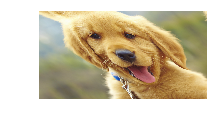

In [ ]:
x().rotate(30).show()

In [ ]:
show_doc(Image.show)

<a id=show></a>**show**(<em>self</em>, <em>ax</em>: Axes=None) -> None


plots the image into `ax`

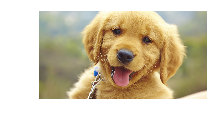

In [ ]:
x().show()

In [ ]:
show_doc(Image.squish)

<a id=<lambda>></a>**<lambda>**(<em>x</em>)

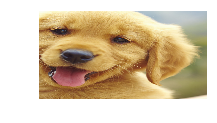

In [ ]:
x().squish(.5,.2,.8).show()

In [ ]:
show_doc(Image.zoom)

<a id=<lambda>></a>**<lambda>**(<em>x</em>)

In [ ]:
zoom_matrix = zoom().tfm.func(scale=0.5, row_pct=.25, col_pct=.75)
torch.Tensor(zoom_matrix)

tensor([[ 2.0000,  0.0000, -0.5000],
        [ 0.0000,  2.0000,  0.5000],
        [ 0.0000,  0.0000,  1.0000]])

In [ ]:
show_doc(Image.zoom_squish)

<a id=<lambda>></a>**<lambda>**(<em>x</em>)

In [ ]:
show_doc(image2np)

<a id=image2np></a>**image2np**(<em>image</em>: Tensor) -> ndarray


convert from torch style `image` to numpy/matplot style

In [ ]:
show_doc(ImageBase)

<a id=ImageBase></a><em>class</em> **ImageBase**() :: Inherits from (`ItemBase`)


Img based `Dataset` items derive from this. Subclass to handle lighting, pixel, etc

In [ ]:
show_doc(ImageBase.affine)

<a id=affine></a>**affine**(<em>self</em>, <em>func</em>: typing.Callable[[typing.Dict[str, typing.Any]], torch.Tensor]) -> ImageBase

In [ ]:
show_doc(ImageBase.clone)

<a id=clone></a>**clone**(<em>self</em>) -> ImageBase


clones this item and its `data`

In [ ]:
show_doc(ImageBase.coord)

<a id=coord></a>**coord**(<em>self</em>, <em>func</em>: typing.Callable[[torch.Tensor, typing.Tuple[int, int, int], typing.Collection[typing.Any], typing.Dict[str, typing.Any]], torch.Tensor]) -> ImageBase

In [ ]:
show_doc(ImageBase.lighting)

<a id=lighting></a>**lighting**(<em>self</em>, <em>func</em>: typing.Callable[[torch.Tensor, typing.Collection[typing.Any], typing.Dict[str, typing.Any]], torch.Tensor]) -> ImageBase

In [ ]:
show_doc(ImageBase.pixel)

<a id=pixel></a>**pixel**(<em>self</em>, <em>func</em>: typing.Callable[[torch.Tensor, typing.Collection[typing.Any], typing.Dict[str, typing.Any]], torch.Tensor]) -> ImageBase

In [ ]:
show_doc(ImageBase.set_sample)

<a id=set_sample></a>**set_sample**(<em>self</em>) -> ImageBase


set parameters that control how we `grid_sample` the image after transforms are applied

In [ ]:
show_doc(ItemBase)

<a id=ItemBase></a><em>class</em> **ItemBase**()


All tranformable dataset items use this type

In [ ]:
show_doc(log_uniform)

<a id=log_uniform></a>**log_uniform**(<em>low</em>, <em>high</em>, <em>size</em>=None)


draw 1 or shape=`size` random floats from uniform dist: min=log(`low`), max=log(`high`)

In [ ]:
show_doc(open_image)

<a id=open_image></a>**open_image**(<em>fn</em>: typing.Union[pathlib.Path, str])


return `Image` object created from image in file `fn`

In [ ]:
show_doc(pil2tensor)

<a id=pil2tensor></a>**pil2tensor**(<em>image</em>: ndarray) -> Tensor


convert PIL style `image` array to torch style image tensor `get_image_files`

In [ ]:
show_doc(rand_bool, arg_comments={'p': 'probability - range (0, 1)'})

<a id=rand_bool></a>**rand_bool**(<em>p</em>: float, <em>size</em>=None)


draw 1 or shape=`size` random booleans (True occuring probability p)

- *p*: probability - range (0, 1)

In [ ]:
show_doc(RandTransform)

<a id=RandTransform></a><em>class</em> **RandTransform**(<em>tfm</em>: Transform, <em>kwargs</em>: dict, <em>p</em>: int=1.0, <em>resolved</em>: dict=<factory>, <em>do_run</em>: bool=True, <em>is_random</em>: bool=True) -> None


wraps `Transform` to add randomized execution

In [ ]:
show_doc(RandTransform.resolve)

<a id=resolve></a>**resolve**(<em>self</em>) -> None


bind any random variables needed tfm calc

In [ ]:
tfm = jitter(magnitude=(0,10))
print(f'Before resolve: {tfm.resolved.get("magnitude")}')
print(f'After  resolve: {tfm.resolve().resolved.get("magnitude")}')

Before resolve: None
After  resolve: 0.4249219743399135


In [ ]:
show_doc(resolve_tfms)

<a id=resolve_tfms></a>**resolve_tfms**(<em>tfms</em>: typing.Collection[fastai.vision.transform.Transform])


resolve every tfm in `tfms`

See [RandomTransform.resolve](#RandTransform.resolve)

In [ ]:
show_doc(show_image)

<a id=show_image></a>**show_image**(<em>img</em>: Tensor, <em>ax</em>: Axes=None, <em>figsize</em>: tuple=(3, 3), <em>hide_axis</em>: bool=True, <em>title</em>: typing.Union[str, NoneType]=None, <em>cmap</em>: str=binary, <em>alpha</em>: typing.Union[float, NoneType]=None) -> Axes


plot tensor `img` using matplotlib axis `ax`.  `figsize`,`axis`,`title`,`cmap` and `alpha` pass to `ax.imshow`

In [ ]:
import torch

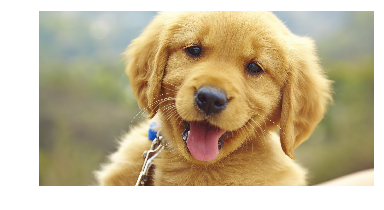

In [ ]:
img_t:torch.Tensor = x().px
fig, ax = plt.subplots()
show_image(img_t, ax)

In [ ]:
show_doc(show_image_batch)

<a id=show_image_batch></a>**show_image_batch**(<em>dl</em>: DataLoader, <em>classes</em>: typing.Collection[str], <em>rows</em>: typing.Union[int, NoneType]=None, <em>figsize</em>: typing.Tuple[int, int]=(12, 15)) -> None


show a batch of images from `dl` titled according to `classes`

In [ ]:
show_doc(show_images)

<a id=show_images></a>**show_images**(<em>x</em>: typing.Collection[fastai.vision.transform.Image], <em>y</em>: int, <em>rows</em>: int, <em>classes</em>: typing.Collection[str], <em>figsize</em>: typing.Tuple[int, int]=(9, 9)) -> None


plot images (`x[i]`) from `x` titled according to classes[y[i]]

In [ ]:
# tfms = [contrast(scale=(0.3,3.0), p=0.9),
#         brightness(change=(0.35,0.65), p=0.9)]
# imgs = [apply_tfms(tfms,x()).px for i in range(4)]
# show_images(imgs, ['dog']*4, 2, {'dog':None}, figsize=(6,6))

### Transform types
Transformations are grouped in the following types. Groups are applied in `order`


In [ ]:
show_doc(TfmAffine, arg_comments={'order': 'order the transform gets applied (default 5)'}, 
         alt_doc_string='Any transformation that preserves the points and lines of a shape. See zoom, squish, rotate')

<a id=TfmAffine></a><em>class</em> **TfmAffine**(<em>func</em>: typing.Callable, <em>order</em>: typing.Union[int, NoneType]=None) -> None :: Inherits from (`Transform`)


Any transformation that preserves the points and lines of a shape. See zoom, squish, rotate

- *order*: order the transform gets applied (default 5)

In [ ]:
zoom_matrix = zoom().tfm.func(scale=0.5, row_pct=.25, col_pct=.75)
torch.Tensor(zoom_matrix)

tensor([[ 2.0000,  0.0000, -0.5000],
        [ 0.0000,  2.0000,  0.5000],
        [ 0.0000,  0.0000,  1.0000]])

In [ ]:
show_doc(TfmCoord,  arg_comments={'order': 'order the transform gets applied (default 4)'})

<a id=TfmCoord></a><em>class</em> **TfmCoord**(<em>func</em>: typing.Callable, <em>order</em>: typing.Union[int, NoneType]=None) -> None :: Inherits from (`Transform`)


Utility class for adding probability and wrapping support to transform funcs

- *order*: order the transform gets applied (default 4)

In [ ]:
show_doc(TfmLighting,  arg_comments={'order': 'order the transform gets applied (default 8)'},
        alt_doc_string='Transform pixel color values')

<a id=TfmLighting></a><em>class</em> **TfmLighting**(<em>func</em>: typing.Callable, <em>order</em>: typing.Union[int, NoneType]=None) -> None :: Inherits from (`Transform`)


Transform pixel color values

- *order*: order the transform gets applied (default 8)

In [ ]:
show_doc(TfmPixel,  arg_comments={'order': 'order the transform gets applied (default 10)'})

<a id=TfmPixel></a><em>class</em> **TfmPixel**(<em>func</em>: typing.Callable, <em>order</em>: typing.Union[int, NoneType]=None) -> None :: Inherits from (`Transform`)


wraps pixel tfm funcs

- *order*: order the transform gets applied (default 10)

In [ ]:
show_doc(Transform)

<a id=Transform></a><em>class</em> **Transform**(<em>func</em>: typing.Callable, <em>order</em>: typing.Union[int, NoneType]=None) -> None


Utility class for adding probability and wrapping support to transform funcs

In [ ]:
show_doc(Transform.calc)

<a id=calc></a>**calc**(<em>tfm</em>, <em>x</em>: Image) -> Image


apply our `tfm` to image `x`, wrapping it if necessary

In [ ]:
show_doc(uniform)

<a id=uniform></a>**uniform**(<em>low</em>: Number, <em>high</em>: Number, <em>size</em>: typing.List[int]=None) -> float


draw 1 or shape=`size` random floats from uniform dist: min=`low`, max=`high`